              precision    recall  f1-score   support

           0       0.67      0.82      0.74        89
           1       0.88      0.88      0.88       114
           2       0.92      0.73      0.82        97

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.83      0.81      0.82       300



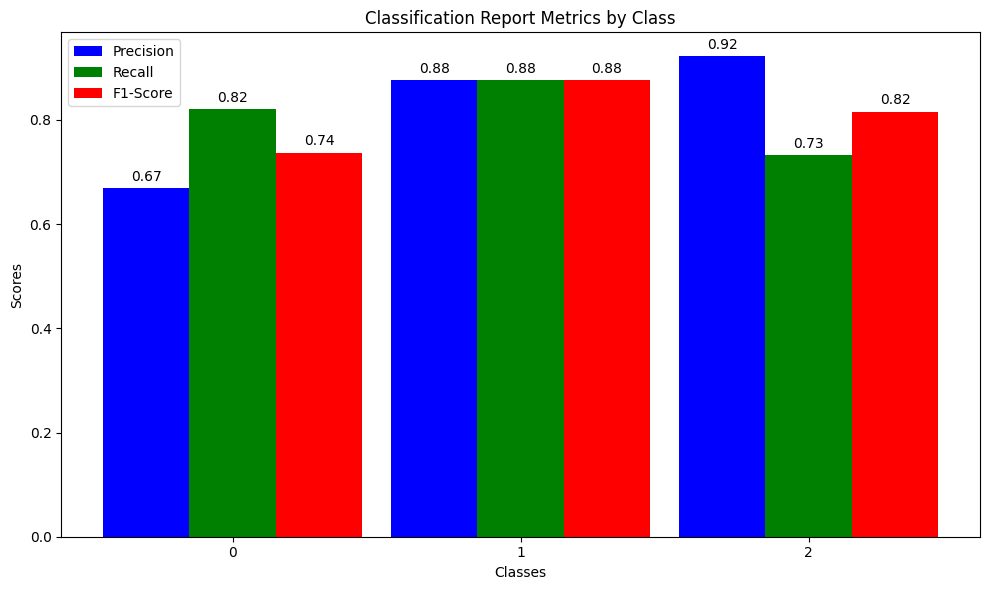

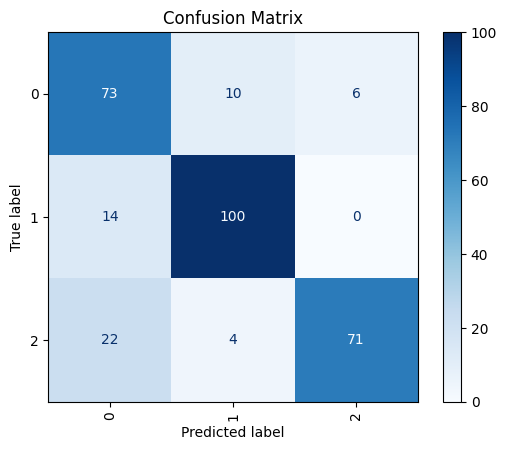

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, random_state=42, n_informative=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

# Visualization of classification report
labels = list(report.keys())[:-3]  # Exclude avg/total scores
precision = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1_score = [report[label]['f1-score'] for label in labels]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='b')
rects2 = ax.bar(x, recall, width, label='Recall', color='g')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='r')

# Add labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add value labels on top of bars
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()
